In [227]:
import numpy as np
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from pdb import set_trace
from data.data_utils import load_dataset
import random

np.random.seed(42)


# Full batch gradient descent

In [228]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('pumadyn32nm')
x_train, y_train = x_train[:1000], y_train[:1000]
x_train = np.random.randn(1000, 32)
y_train = np.random.randn(1000)

In [229]:
x_train.shape # 32 = number of features in the data

(1000, 32)

In [230]:
y_train.shape

(1000,)

In [231]:
# Get RMSE
def RMSE(y, y_hat):
  return np.sqrt(np.mean(np.square(y-y_hat)))

Epoch 0: Training error = 1.0441501921109302
Epoch 100: Training error = 1.0326091181844579
Epoch 200: Training error = 1.0326091181844579
Epoch 300: Training error = 1.0326091181844579
Epoch 400: Training error = 1.0326091181844579
Epoch 500: Training error = 1.0326091181844579
Epoch 600: Training error = 1.0326091181844579
Epoch 700: Training error = 1.0326091181844579
Epoch 800: Training error = 1.0326091181844579
Epoch 900: Training error = 1.0326091181844579


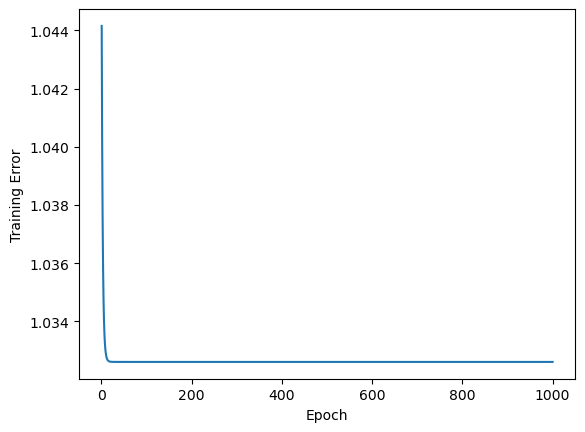

Test RMSE = 0.9854804178508694


In [232]:
# Set the learning rate and the number of epochs
lr = 0.1
epochs = 1000

# Initialize the weights with zeros
w = np.zeros(x_train.shape[1]) #(32,)
train_errors = []
# Start the training loop
for epoch in range(epochs):
    # Compute the predicted values
    grad_w = (2/x_train.shape[0]) * x_train.T.dot(x_train.dot(w) - y_train)
    # Update the weights
    w = w - lr * grad_w
    # Compute the training error
    y_hat = x_train.dot(w)
    train_error = RMSE(y_train, y_hat)
    train_errors.append(train_error)
    # Print the training error every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Training error = {train_error}")

# Compute the predicted values for the testing dataset
y_hat_test = np.dot(x_test, w)

# Compute the testing error
test_error = RMSE(y_test, y_hat_test)

# plot training error versus epochs
plt.plot(range(1, epochs+1), train_errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.show()
# Print the final testing error (root mean squared error)
print(f"Test RMSE = {test_error}")

In [233]:
y_train.shape

(1000,)

## Stochastic gradient descent (SGD) with mini-batch size 1

Epoch 0: Training error = 1.04399452492072
Epoch 100: Training error = 1.03520993667947
Epoch 200: Training error = 1.0350851369361223
Epoch 300: Training error = 1.0335580783874048
Epoch 400: Training error = 1.0342628024474707
Epoch 500: Training error = 1.0344148393335195
Epoch 600: Training error = 1.0347952755485572
Epoch 700: Training error = 1.035166151668398
Epoch 800: Training error = 1.0340341409304001
Epoch 900: Training error = 1.036038209001364


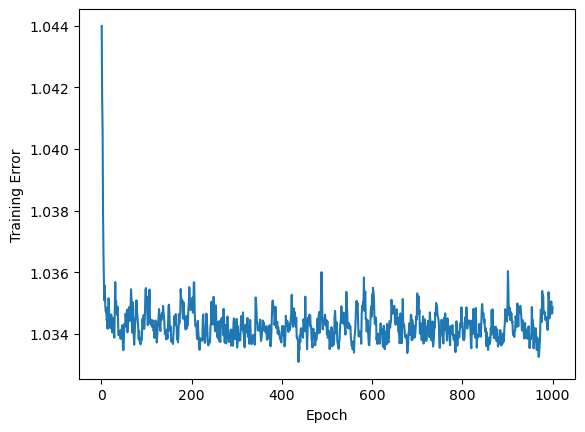

Test RMSE = 0.9887640716345992


In [234]:
def sgd_mini_batch(x_train, y_train, x_test, y_test, lr=0.0001, epochs=1000):
    # Initialize the weights with zeros
    w = np.zeros(x_train.shape[1]) #(32,)
    train_errors = []
    # Start the training loop
    for epoch in range(epochs):
        for i in range(x_train.shape[0]):
            # Select a single random data point
            idx = np.random.randint(x_train.shape[0])
            x_i = x_train[idx, :]
            # print(y_train.shape)
            y_i = y_train[idx]
            
            # Compute the gradient of the loss function with respect to the weights
            grad_w = -2 * x_i * (y_i - np.dot(x_i, w))
        
            # Update the weights
            w = w - lr * grad_w
        # Compute the training error
        y_hat = x_train.dot(w)
        train_error = RMSE(y_train, y_hat)
        train_errors.append(train_error)
        # Print the training error every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Training error = {train_error}")

    # Compute the predicted values for the testing dataset
    y_hat_test = np.dot(x_test, w)

    # Compute the testing error
    test_error = RMSE(y_test, y_hat_test)

    # plot training error versus epochs
    plt.plot(range(1, epochs+1), train_errors)
    plt.xlabel('Epoch')
    plt.ylabel('Training Error')
    plt.show()
    # Print the final testing error (root mean squared error)
    print(f"Test RMSE = {test_error}")


sgd_mini_batch(x_train, y_train, x_test, y_test)

## Stochastic gradient descent (SGD) with mini-batch size 10

Epoch 0: Training error = 1.0496046465036957
Epoch 100: Training error = 1.033028772754261
Epoch 200: Training error = 1.0326225475871722
Epoch 300: Training error = 1.0326099218524925
Epoch 400: Training error = 1.0326094881309658
Epoch 500: Training error = 1.0326094783232689
Epoch 600: Training error = 1.0326094795992433
Epoch 700: Training error = 1.0326094800184438
Epoch 800: Training error = 1.032609480117923
Epoch 900: Training error = 1.0326094801413646
Epoch 1000: Training error = 1.032609480147096
Epoch 1100: Training error = 1.0326094801485461
Epoch 1200: Training error = 1.0326094801489216
Epoch 1300: Training error = 1.0326094801490202
Epoch 1400: Training error = 1.0326094801490462
Epoch 1500: Training error = 1.0326094801490533
Epoch 1600: Training error = 1.0326094801490548
Epoch 1700: Training error = 1.0326094801490553
Epoch 1800: Training error = 1.0326094801490555
Epoch 1900: Training error = 1.0326094801490555


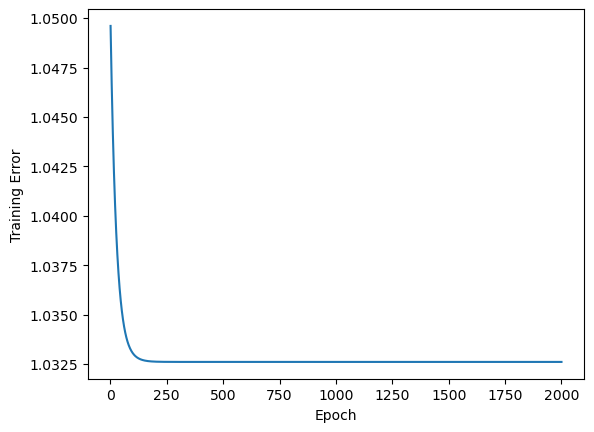

Test RMSE = 0.9855037457112112


In [239]:
def sgd_mini_batch_with_size(x_train, y_train, x_test, y_test, batch_size, lr=0.0001, epochs=2000):
    # Initialize the weights with zeros
    w = np.zeros(x_train.shape[1]) #(32,)
    train_errors = []
    # Start the training loop
    for epoch in range(epochs):
        for i in range(0, x_train.shape[0], batch_size):
            # Select a single random data point
            # idx = np.random.randint(x_train.shape[0])
            x_i = x_train[i:i+batch_size, :]
            # print(x_i.shape)
            y_i = y_train[i:i+batch_size]
            # print(y_i.shape)
            # Compute the gradient of the loss function with respect to the weights
            grad_w = (2/x_i.shape[0]) * x_i.T.dot(x_i.dot(w) - y_i)        
            # Update the weights
            w = w - lr * grad_w
        # Compute the training error
        y_hat = x_train.dot(w)
        train_error = RMSE(y_train, y_hat)
        train_errors.append(train_error)
        # Print the training error every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Training error = {train_error}")

    # Compute the predicted values for the testing dataset
    y_hat_test = np.dot(x_test, w)

    # Compute the testing error
    test_error = RMSE(y_test, y_hat_test)

    # plot training error versus epochs
    plt.plot(range(1, epochs+1), train_errors)
    plt.xlabel('Epoch')
    plt.ylabel('Training Error')
    plt.show()
    # Print the final testing error (root mean squared error)
    print(f"Test RMSE = {test_error}")


sgd_mini_batch_with_size(x_train, y_train, x_test, y_test, 10)

## Stochastic gradient descent (SGD) with mini-batch size 1 and momentum

Epoch 0: Training error = 1.0448987852310465
Epoch 100: Training error = 1.0351007137930524
Epoch 200: Training error = 1.0362241563778558
Epoch 300: Training error = 1.0351026688810452
Epoch 400: Training error = 1.0339252908225
Epoch 500: Training error = 1.033952260905055
Epoch 600: Training error = 1.0343702169256095
Epoch 700: Training error = 1.034201089882453
Epoch 800: Training error = 1.0343262273448224
Epoch 900: Training error = 1.0334990611915158
Epoch 1000: Training error = 1.0342635421505113
Epoch 1100: Training error = 1.0335750567013677
Epoch 1200: Training error = 1.0341195514678176
Epoch 1300: Training error = 1.0354140098135307
Epoch 1400: Training error = 1.0341390630658398
Epoch 1500: Training error = 1.0340871240484424
Epoch 1600: Training error = 1.0338908132384639
Epoch 1700: Training error = 1.0341467598073766
Epoch 1800: Training error = 1.0343292967824866
Epoch 1900: Training error = 1.0340027197692545


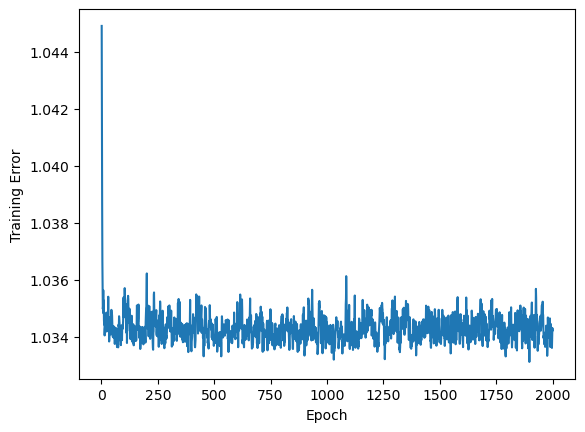

Test RMSE = 0.9875988188172418


In [240]:
def sgd_mini_batch_with_momentum(x_train, y_train, x_test, y_test, momentum, lr=0.0001, epochs=2000):
    # Initialize the weights with zeros
    w = np.zeros(x_train.shape[1]) #(32,)
    v_w = np.zeros(x_train.shape[1]) #(32,)
    train_errors = []
    # Start the training loop
    for epoch in range(epochs):
        for i in range(x_train.shape[0]):
            # Select a single random data point
            idx = np.random.randint(x_train.shape[0])
            x_i = x_train[idx, :]
            # print(y_train.shape)
            y_i = y_train[idx]
            
            # Compute the gradient of the loss function with respect to the weights
            grad_w = -2 * x_i * (y_i - np.dot(x_i, w))
        
            # Update the weights
            v_w = (momentum * v_w + (1-momentum) * grad_w)
            w = w - lr * v_w
        # Compute the training error
        y_hat = x_train.dot(w)
        train_error = RMSE(y_train, y_hat)
        train_errors.append(train_error)
        # Print the training error every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Training error = {train_error}")

    # Compute the predicted values for the testing dataset
    y_hat_test = np.dot(x_test, w)

    # Compute the testing error
    test_error = RMSE(y_test, y_hat_test)

    # plot training error versus epochs
    plt.plot(range(1, epochs+1), train_errors)
    plt.xlabel('Epoch')
    plt.ylabel('Training Error')
    plt.show()
    # Print the final testing error (root mean squared error)
    print(f"Test RMSE = {test_error}")


sgd_mini_batch_with_momentum(x_train, y_train, x_test, y_test, 0.2)